# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:\\Users\\Owner\\OneDrive\\Desktop\\Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Owner\\OneDrive\\Desktop\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)
# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
study_data_complete

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [59]:
# Checking the number of mice.
mice_count = len(study_data_complete["Mouse ID"].unique())
mice_count

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = study_data_complete.drop_duplicates(subset=["Mouse ID" , "Timepoint"], keep=False)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [63]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(cleaned_data["Mouse ID"].unique())
new_mice_count

249

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volumme = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_table = {"Mean Tumor Volume" : mean_tumor_volumme,
                 "Median Tumor Volume" : median_tumor_volume,
                 "Tumor Volume Variance" : tumor_volume_variance,
                 "Tumor Volume Std. Dev." : tumor_volume_std,
                 "Tumor Volume Std. Err." : tumor_volume_std_err}
print(summary_table)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_statistics =  pd.DataFrame(summary_table)
drug_statistics



{'Mean Tumor Volume': Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64, 'Median Tumor Volume': Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64, 'Tumor Volume Variance': Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64, 'Tumor Volume Std. Dev.': Drug Regimen
Capomulin    4.994774
Ceftamin     6

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_adv = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_table_adv_df = pd.DataFrame(summary_table_adv)
summary_table_adv_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

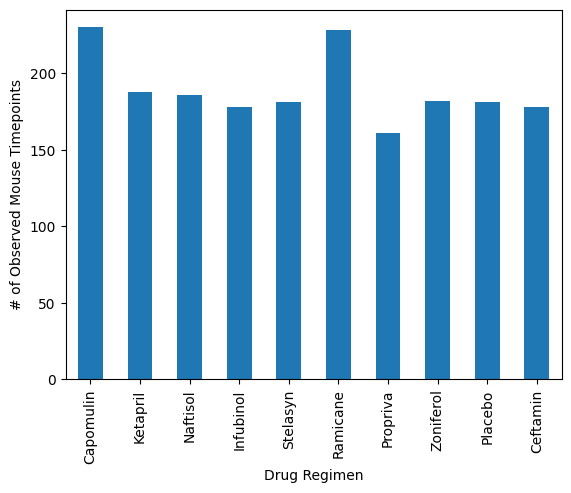

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#drug_names = list(study_data_complete["Drug Regimen"].unique())
#print(drug_names)
drug_names = list(study_data_complete["Drug Regimen"].unique())

timepoints = list(study_data_complete["Drug Regimen"].value_counts(sort=False))


drug_and_time = pd.DataFrame({"Drug Regimen" : list(study_data_complete["Drug Regimen"].unique()),
                              "# of Observed Mouse Timepoints" : list(study_data_complete["Drug Regimen"].value_counts(sort=False))
})


timepoint_number = drug_and_time.plot.bar(x="Drug Regimen",y="# of Observed Mouse Timepoints", ylabel = "# of Observed Mouse Timepoints", legend = False);




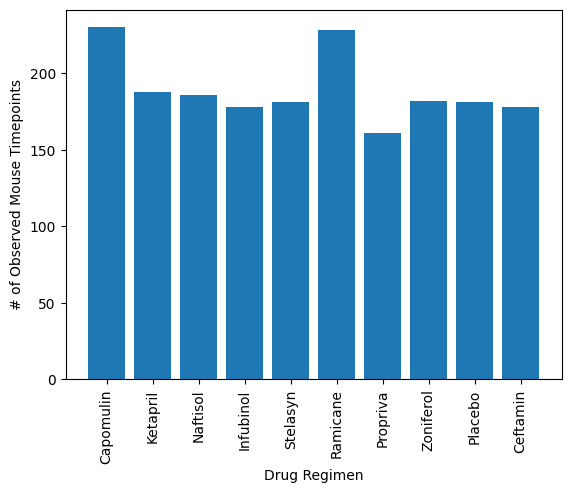

In [67]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Note to self: create data frame, THEN create bar graph.
#Once completed, make sure to transpose this code with the previous cell.
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(drug_names, timepoints);




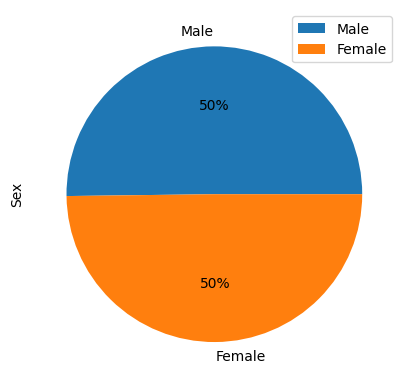

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice = cleaned_data.drop_duplicates("Mouse ID")

num_by_sex = unique_mice["Sex"].value_counts()

num_by_sex_df = pd.DataFrame(num_by_sex)

male_dist = num_by_sex.loc["Male"] / new_mice_count
female_dist = num_by_sex.loc["Female"] / new_mice_count

male_female_dist_df = pd.DataFrame({"Sex" : [male_dist, female_dist]}, index = ["Male","Female"])

male_female = male_female_dist_df.plot.pie(y="Sex", autopct='%1.0f%%')


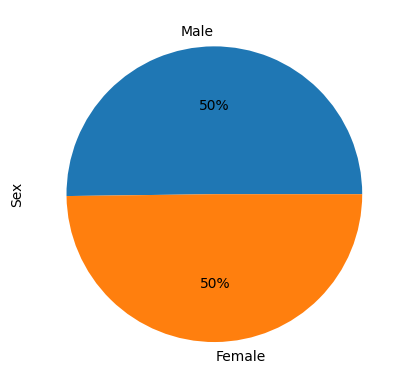

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist = [male_dist, female_dist]
labels = ["Male","Female"]
colors = ["orange", "blue"]
plt.ylabel("Sex")

mice_sex_dist = plt.pie(dist, labels = labels, autopct = "%1.0f%%")


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
timepoint_series = pd.DataFrame(last_timepoint)
timepoint_series.rename(columns = {"Timepoint" : "Last Timepoint"})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
original = cleaned_data.groupby("Mouse ID", sort = False)["Tumor Volume (mm3)"].last()
original_df = pd.DataFrame(original)
original_df

final_timepoint_df = pd.merge(timepoint_series, original_df, on="Mouse ID")
final_timepoint_df




,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,30.638696
z581,45,62.754451


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(cleaned_data["Drug Regimen"].unique())
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


['Capomulin',
 'Ketapril',
 'Naftisol',
 'Infubinol',
 'Stelasyn',
 'Ramicane',
 'Propriva',
 'Zoniferol',
 'Placebo',
 'Ceftamin']

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

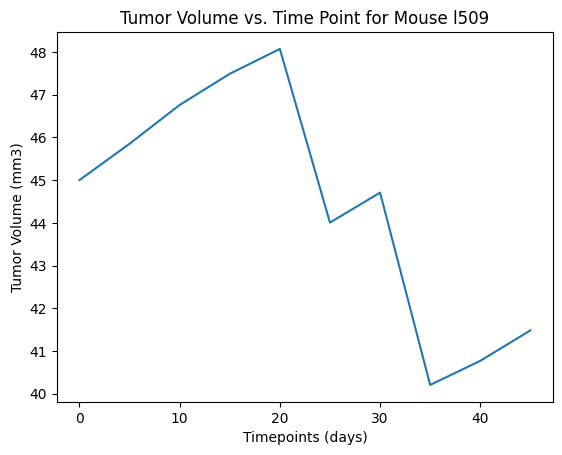

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#cleaned_data.set_index("Mouse ID")
mouse_l509 = cleaned_data.set_index("Mouse ID").loc[["l509"],["Timepoint", "Tumor Volume (mm3)"]]

ls_timepoints = list(mouse_l509["Timepoint"])


mouse_tumor_volume = list(mouse_l509["Tumor Volume (mm3)"])

x_values = ls_timepoints
y_values = mouse_tumor_volume

plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse l509")
plt.plot(x_values, y_values);

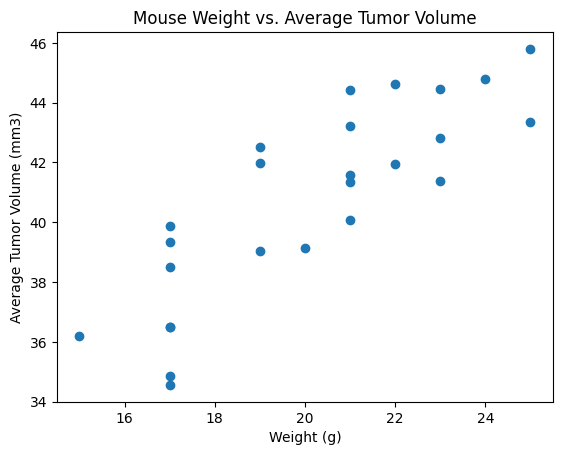

In [127]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen



cleaned_data2 = cleaned_data.copy(deep = True)
cleaned_data2 = cleaned_data2.drop(cleaned_data2[cleaned_data2["Drug Regimen"] != "Capomulin"].index)
cleaned_data2

mouse_weight = cleaned_data2.groupby("Mouse ID", sort = False)["Weight (g)"].mean()
mouse_weight

average_tumor_volume = cleaned_data2.groupby("Mouse ID", sort = False)["Tumor Volume (mm3)"].mean()
average_tumor_volume

x_values = mouse_weight
y_values = average_tumor_volume



plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.scatter(x_values, y_values);

## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weight
y_values = average_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

print(f"y = {slope}x + {intercept}")

print(rvalue)
print(pvalue)



Mouse ID
b128    42.549834
j246    41.595394
r554    37.777635
s185    37.777635
b742    41.595394
x401    35.868756
l509    41.595394
s710    43.504273
r157    45.413153
u364    37.777635
j119    43.504273
v923    41.595394
w914    41.595394
i738    40.640954
r944    45.413153
y793    37.777635
g316    42.549834
g288    39.686515
l897    39.686515
w150    43.504273
t565    37.777635
i557    44.458713
m957    39.686515
f966    37.777635
m601    37.777635
Name: Weight (g), dtype: float64
y = 0.954439689024105x + 21.552160532685004
0.8419363424694724
1.322572243471219e-07
